# Logistic Regression

# Data preperation

In [1]:
import pandas as pd
import numpy as np
import random
import os

In [2]:
age = []
fbs = []
bp = []
chol = []
chest_pain = [] 
height = []
weight =[]

In [3]:
for i in range(20000):
    chpain_t = np.random.randint(0,2)
    chol_t = np.random.randint(150,351)
    fbs_t = np.random.randint(50,201)
    height_t = np.random.randint(140,191)
    weight_t = np.random.randint(35,111)
    bp_t = np.random.randint(75,261)
    if i%5==0 or i%3==0:
        age_t = np.random.choice([np.random.randint(20,46),np.random.randint(71,86)])
    else:
        age_t = np.random.randint(45,71)
    age.append(age_t)
    height.append(height_t)
    weight.append(weight_t)
    chest_pain.append(chpain_t)
    bp.append(bp_t)
    fbs.append(fbs_t)
    chol.append(chol_t)

In [4]:
heart_dict = {'age':age, 'height':height, 'weight':weight, 'chest_pain':chest_pain, 'bp':bp, 'fbs':fbs, 'chol':chol}

In [5]:
df_heart = pd.DataFrame(heart_dict)

In [20]:
df_heart.to_csv("heart_data.csv",index=False)

# Data Filtering

In [23]:
df = pd.read_csv('heart_data.csv')
df1 = pd.read_csv('heart_data.csv')
risk = []
rule = []


In [24]:
for i in range(len(df)):
    bmi = round(((df.iloc[i,2])/((df.iloc[i,1]/100)**2)),2)
    temp = df.iloc[i,:].tolist()
    if((temp[5]>120 and temp[4]>145 and temp[0]>52) or (bmi>=24.5 and temp[6]>210) or (temp[3]==1 and temp[6]>200 and temp[0]>56)):
        risk.append(1)
#         rule.append(1)
    elif((temp[4]>150 and temp[6]>210) or (temp[3]==1 and temp[4]<150 and temp[6]>200) or (temp[5]>=120 and temp[0]>60 and temp[6]<200)):
        risk.append(1)
#         rule.append(2)
    elif((temp[3]==0 and (bmi in range(18,25)) and temp[6]<190 and temp[0]<30) or (temp[5]<120 and temp[6]<190 and temp[0]<40)):
        risk.append(0)
#         rule.append(3)
    else:
        risk.append(0)
#         rule.append(0)
         

In [27]:
df_yes = df1[df1.risk == 1]
df_no = df1[df1.risk == 0]

In [28]:
df_new = df1.iloc[-1:-1,:]

In [29]:
df_new = df_new.append(df_no,ignore_index=True)
df_new = df_new.iloc[:3824,:]
df_new = df_new.append(df_yes,ignore_index=True)

In [30]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,74,149,67,1,196,67,155,0
1,74,183,78,0,130,150,283,0
2,57,146,62,0,225,103,200,0
3,38,172,58,0,120,81,293,0
4,52,185,36,0,130,140,237,0
...,...,...,...,...,...,...,...,...
18440,42,145,78,0,82,107,304,1
18441,74,142,91,0,135,106,225,1
18442,50,180,86,0,152,95,268,1
18443,24,145,79,1,176,143,241,1


In [31]:
df_new = df_new.iloc[:10000,:]

In [32]:
from sklearn.utils import shuffle

df_new = shuffle(df_new).reset_index(drop=True)

In [33]:
df_new.risk.value_counts()

1    6176
0    3824
Name: risk, dtype: int64

In [34]:
df_new.to_csv('heart_pred_data1.csv',index=False)

# Logistic Regression

In [36]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from matplotlib.colors import ListedColormap
df = pd.read_csv('heart_pred_data.csv')
print("----------------------------------Data------------------------------------")
print(df)

----------------------------------Data------------------------------------
      age  height  weight  chest_pain   bp  fbs  chol  risk
0      67     141      35           1  185   84   333     1
1      73     164      46           1  231  123   208     1
2      59     158      86           1   93   61   194     0
3      59     154      54           1   98  187   265     1
4      36     186     103           0  186  131   325     1
...   ...     ...     ...         ...  ...  ...   ...   ...
9995   77     174      66           0  193  188   207     1
9996   47     182      86           1  220  134   245     1
9997   77     152      72           1  245   50   204     1
9998   75     170     107           0  239  137   160     1
9999   49     170      67           0  107   53   322     0

[10000 rows x 8 columns]


# Distribution of Numerical Features

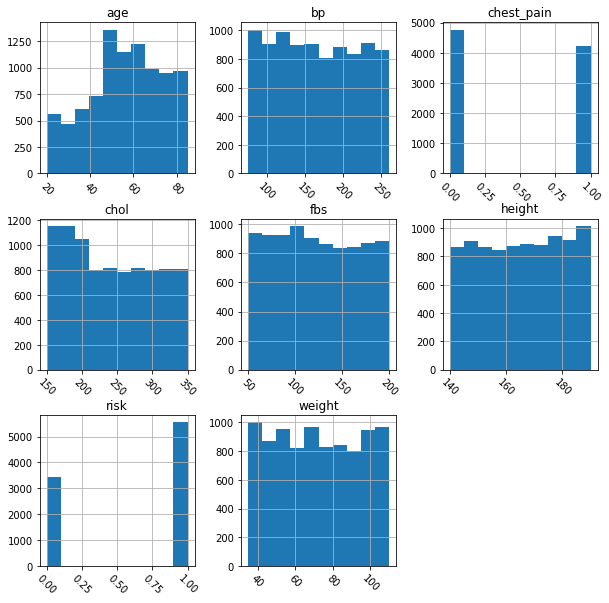

In [55]:
df.hist(figsize=(10,10), xrot=-45, bins=10)
plt.show()

# Correlation

In [56]:
corr = df.corr()
corr

,age,height,weight,chest_pain,bp,fbs,chol,risk
age,1.000000,0.027508,-0.017230,-0.003424,0.009186,-0.011798,0.035971,0.164814
height,0.027508,1.000000,-0.013926,-0.017302,-0.015414,-0.009118,0.024080,-0.057702
weight,-0.017230,-0.013926,1.000000,0.016279,0.031407,0.004163,-0.024147,0.136007
chest_pain,-0.003424,-0.017302,0.016279,1.000000,0.029892,0.003017,-0.020000,0.173258
bp,0.009186,-0.015414,0.031407,0.029892,1.000000,-0.007615,-0.030259,0.172089
fbs,-0.011798,-0.009118,0.004163,0.003017,-0.007615,1.000000,0.037449,0.166315
chol,0.035971,0.024080,-0.024147,-0.020000,-0.030259,0.037449,1.000000,0.531318
risk,0.164814,-0.057702,0.136007,0.173258,0.172089,0.166315,0.531318,1.000000


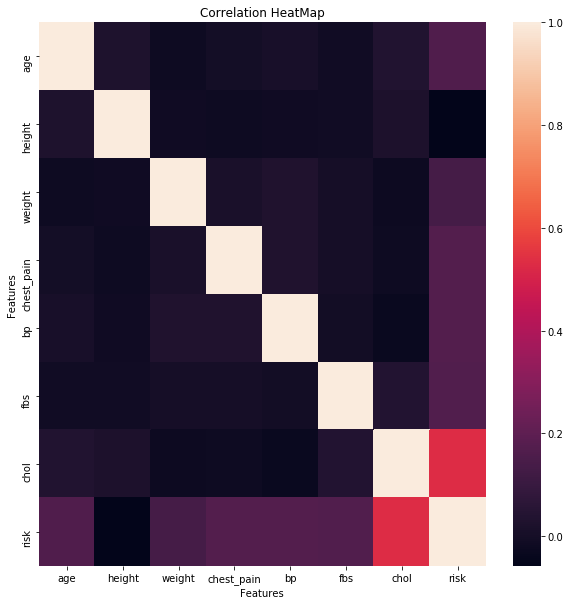

In [57]:
plt.figure(figsize=(10,10))
plt.title("Correlation HeatMap")
sns.heatmap(corr)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

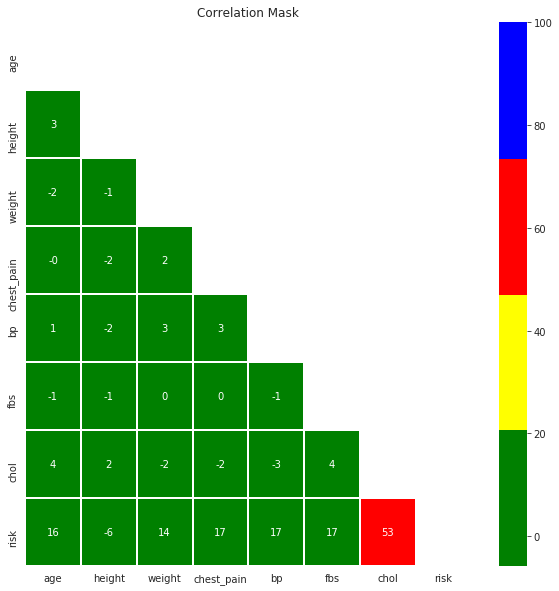

In [58]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))
plt.title("Correlation Mask")
plt.show()

# Box_plot

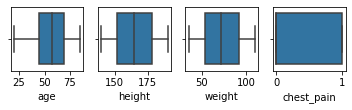

In [61]:
ax2=plt.subplot(341, frameon=True)
sns.boxplot(x=df['age'])
ax2=plt.subplot(342, frameon=True)
sns.boxplot(x=df['height'])
ax2=plt.subplot(343, frameon=True)
sns.boxplot(x=df['weight'])
ax2=plt.subplot(344, frameon=True)
sns.boxplot(x=df['chest_pain'])

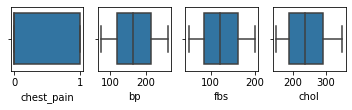

In [62]:
ax2=plt.subplot(341, frameon=True)
sns.boxplot(x=df['chest_pain'])
ax2=plt.subplot(342, frameon=True)
sns.boxplot(x=df['bp'])
ax2=plt.subplot(343, frameon=True)
sns.boxplot(x=df['fbs'])
ax2=plt.subplot(344, frameon=True)
sns.boxplot(x=df['chol'])

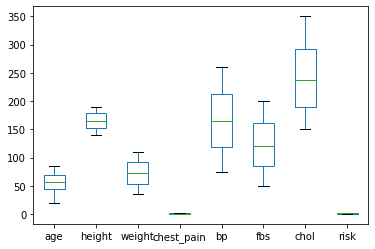

In [63]:
df.plot(kind='box')
plt.show()

In [37]:
#splittng data for prediction
df1 = df.iloc[9000:,:]
df = df.iloc[:9000,:]

In [39]:
test_XX = df1.iloc[:,:-1].values
actual_yy = df1.iloc[:,-1].values  # Desired Values................
actual_y = actual_yy.tolist()
df.risk.value_counts()

1    5555
0    3445
Name: risk, dtype: int64

In [40]:
print("----------------------------------------Data Description----------------------------------------")
df.describe()

----------------------------------------Data Description----------------------------------------


,age,height,weight,chest_pain,bp,fbs,chol,risk
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,56.035000,165.105333,72.091778,0.470333,165.106000,123.103778,242.058333,0.617222
std,16.982469,14.667255,22.202545,0.499147,54.042937,43.440135,59.374787,0.486092
min,20.000000,140.000000,35.000000,0.000000,75.000000,50.000000,150.000000,0.000000
25%,45.000000,152.000000,53.000000,0.000000,118.000000,85.000000,189.000000,0.000000
50%,57.000000,165.000000,72.000000,0.000000,164.000000,121.000000,238.000000,1.000000
75%,69.000000,178.000000,92.000000,1.000000,213.000000,161.000000,293.000000,1.000000
max,85.000000,190.000000,110.000000,1.000000,260.000000,200.000000,350.000000,1.000000


In [41]:
X = df.iloc[:,:7]
Y = df.iloc[:,-1]

In [42]:
db_no =df[df.risk == 0]
db_yes = df[df.risk == 1]
# df_minority_upsampled = resample(db_yes,replace=True)
# new_df = pd.concat([db_no, df_minority_upsampled])
#df_minority_upsampled.value_counts()
# new_df = shuffle(new_df)
X_features = list( df.columns )[:-1]

print("Features: ",X_features)

Features:  ['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']


In [45]:
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.2,random_state = 65)

In [47]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit( train_X, train_y)
pred_y0 = logit.predict(test_X)

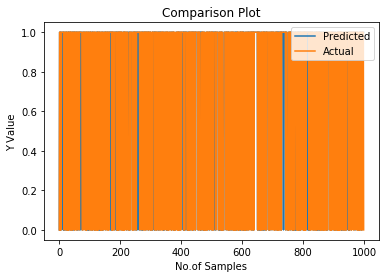

In [48]:
pred = logit.predict(test_XX)  # Prediction 
def comaprison_plot(pred,actual):
    plt.plot(np.arange(1000),pred,label='Predicted')
    plt.plot(np.arange(1000),actual,label='Actual')
    plt.xlabel('No.of Samples')
    plt.ylabel('Y Value')
    plt.legend(loc='upper right')
    plt.title('Comparison Plot')
    plt.show()

comaprison_plot(pred,actual_yy)

In [49]:
r20=r2_score(test_y, pred_y0) 
mse0=mean_squared_error(test_y, pred_y0)
print("R Squared Error : ",r20)
print("Mean Squared Error : ",mse0)

R Squared Error :  0.27078633802946594
Mean Squared Error :  0.1711111111111111


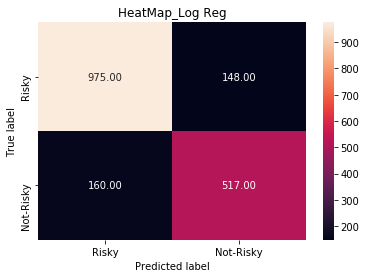

In [50]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_Log Reg')
    plt.show()
draw_cm(test_y,pred_y0 )

In [51]:
print( metrics.classification_report( test_y, pred_y0 ) )

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       677
           1       0.86      0.87      0.86      1123

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.83      1800



# Perfomence Comparison

In [52]:
acc0 = metrics.accuracy_score(test_y, pred_y0)
print("Accuracy:",acc0)

prec0 = metrics.precision_score(test_y, pred_y0)
print("Precision:",prec0)

recall0 = metrics.recall_score(test_y, pred_y0)
print("Recall:",recall0)

f1sc0 = metrics.f1_score(test_y, pred_y0)
print("F1-Score:",f1sc0)

kappa0 = metrics.cohen_kappa_score(test_y, pred_y0)
print("Kappa-Stat:",kappa0)

Accuracy: 0.8288888888888889
Precision: 0.8590308370044053
Recall: 0.8682101513802315
F1-Score: 0.8635961027457927
Kappa-Stat: 0.6341052937255394


# ROC_curve

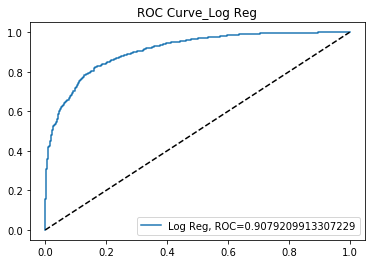

In [53]:
y_pred_proba0 = logit.predict_proba(test_X)[:,1]
fpr0, tpr0, _ = metrics.roc_curve( test_y,  y_pred_proba0)
auc0 = metrics.roc_auc_score( test_y, y_pred_proba0)
plt.plot(fpr0,tpr0,label="Log Reg, ROC="+str(auc0))
plt.legend(loc=4)
plt.title('ROC Curve_Log Reg')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# Lift curve

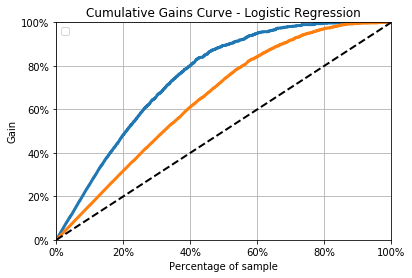

In [54]:
predicted_probas0 = logit.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas0)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.legend('')
plt.title("Cumulative Gains Curve - Logistic Regression")
plt.show()